# Königsberg Bridge Problem

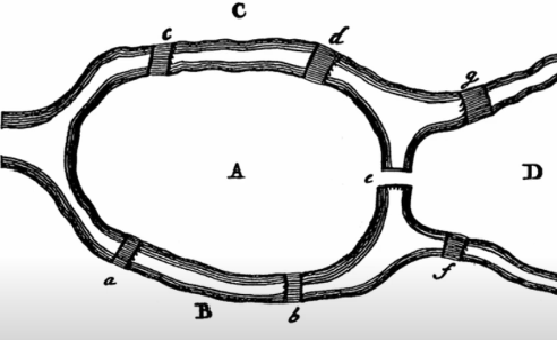

### Representing walks in the city with a string

"CcAaBbAdCgDeA" This is a path

**ABCD** = land area, **abcdefg** = bridges

In [1]:
BRIDGES = [
    "AaB",
    "AbB",
    "AcC",
    "AdC",
    "AeD",
    "BfD",
    "CgD",
]

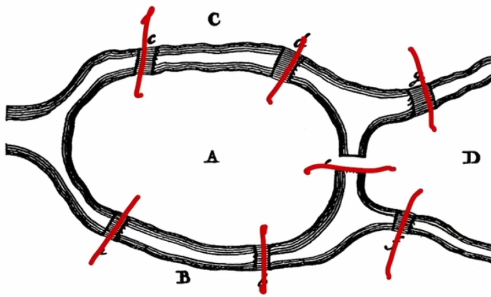

Generate all possible walks starting from a land area

In [2]:
def get_walks_starting_from(area, bridges=BRIDGES):
    walks = []

    def make_walks(area, walked=None, bridges_crossed=None):
        walked = walked or area
        bridges_crossed = bridges_crossed or ()

        available_bridges = [
            bridge
            for bridge in bridges
            if area in bridge and bridge not in bridges_crossed
        ]

        # determine if walk has ended
        if not available_bridges:
            walks.append(walked)

        # walk the bridge to the adjacent area and recurse
        for bridge in available_bridges:
            crossing = bridge[1:] if bridge[0] == area else bridge[1::-1] # AaB or BaA
            make_walks(
                area=crossing[-1],
                walked=walked + crossing,
                bridges_crossed=(bridge, *bridges_crossed),
            )
    make_walks(area)
    return walks

In [3]:
walks_starting_from = {area: get_walks_starting_from(area) for area in "ABCD"}
num_total_walks = sum(len(walks) for walks in walks_starting_from.values())
print(num_total_walks)

372


In [4]:
walks_starting_from["A"][:3]

['AaBbAcCdAeDfB', 'AaBbAcCdAeDgC', 'AaBbAcCgDeAdC']

Check for abcdefg in the walks

In [5]:
# we should see 15 characters (7 pairs of bridges and lands and the final land area)

from itertools import chain
all_walks = chain.from_iterable(walks_starting_from.values())
solutions = [walk for walk in all_walks if len(walk) == 15]
print(len(solutions)) 

0


**Impossible to use all paths.**

**Impossible to walk all the 7 bridges at least once**

This lead to the invention of Graph theory and Topology.

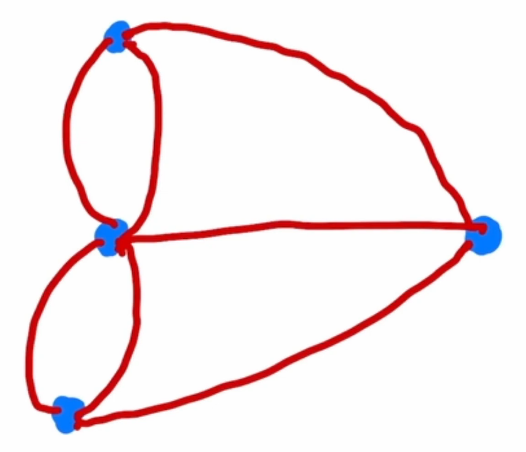

Euler proved that for a path to cross each bridge exactly once and return to the starting point, every node in the graph must have an even number of edges (bridges) connected to it, except for the starting and ending nodes, which may have an odd number of edges (in this case, the starting and ending nodes would have an odd degree).

In the case of the Königsberg Bridge Problem, all four nodes (A, B, C, and D) have an odd degree (3), meaning that there is no Eulerian path that meets the criteria, and thus, it is impossible to find a single walk that crosses each bridge exactly once and returns to the starting point.

Euler's solution to the Königsberg Bridge Problem marked the beginning of graph theory, a branch of mathematics with numerous real-world applications, ranging from computer networks to transportation systems and social networks.

Thus, no matter how you try to walk through the city of Königsberg and cross its seven bridges, you will not be able to find a path that meets the conditions of the problem: crossing each bridge exactly once and returning to the starting point. This impossibility intrigued mathematicians and led to the development of graph theory as a separate mathematical field.